In [2]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

In [135]:
data=pd.read_csv('data.csv', index_col=0)
data

,Adventure Market Share,Action Market Share,Drama Market Share,Comedy Market Share,Thriller-or-Suspense Market Share,Horror Market Share,Romantic-Comedy Market Share,Musical Market Share,Other Genres Market Share,Total Tickets,GDP % Growth,"% Income Annual Change, Chained Dollars"
1995,0.145,0.197,0.287,0.1970,0.0621,0.0278,0.0559,0.0000,0.0282,1221689691,2.6843,3.3
1996,0.223,0.211,0.234,0.1800,0.0531,0.0195,0.0740,0.0004,0.0050,1305169274,3.7725,3.2
1997,0.138,0.229,0.188,0.2040,0.1010,0.0641,0.0467,0.0179,0.0113,1385218935,4.4472,3.7
1998,0.238,0.143,0.232,0.1160,0.1160,0.0470,0.0739,0.0099,0.0242,1443827003,4.4814,5.9
1999,0.219,0.124,0.199,0.1840,0.0783,0.0650,0.0984,0.0032,0.0291,1444664086,4.7532,3.3
2000,0.176,0.168,0.232,0.1960,0.0759,0.0491,0.0497,0.0123,0.0410,1397460079,4.1275,5.0
2001,0.271,0.166,0.164,0.1760,0.0807,0.0468,0.0633,0.0083,0.0239,1476216078,0.9983,2.7
2002,0.307,0.152,0.174,0.1420,0.1030,0.0325,0.0627,0.0063,0.0205,1575754768,1.7417,3.0
2003,0.263,0.229,0.120,0.1950,0.0416,0.0490,0.0542,0.0184,0.0298,1524299815,2.8612,2.7
2004,0.310,0.115,0.148,0.1800,0.0853,0.0510,0.0701,0.0024,0.0382,1495647988,3.7989,3.3


In [4]:
col = data.columns[:len(data.columns)-3]
income = data.columns[-1]

## Data Summary

In [5]:
summary = data.describe()
summary

,Adventure Market Share,Action Market Share,Drama Market Share,Comedy Market Share,Thriller-or-Suspense Market Share,Horror Market Share,Romantic-Comedy Market Share,Musical Market Share,Other Genres Market Share,Total Tickets,GDP % Growth,"% Income Annual Change, Chained Dollars"
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000
mean,0.260167,0.195875,0.167708,0.155517,0.081979,0.048904,0.047208,0.016596,0.026046,1.374503e+09,2.475729,2.833333
std,0.052722,0.056355,0.043889,0.042384,0.024037,0.017981,0.024026,0.017037,0.009205,9.117192e+07,1.590986,1.551344
min,0.138000,0.114000,0.111000,0.071300,0.041600,0.019500,0.006600,0.000000,0.005000,1.221690e+09,-2.536800,-1.300000
25%,0.242500,0.157500,0.134750,0.125000,0.063300,0.033250,0.029600,0.006250,0.020175,1.309371e+09,1.817000,2.225000
50%,0.266500,0.194000,0.161000,0.147000,0.080950,0.048000,0.049850,0.011100,0.026800,1.377161e+09,2.624050,3.100000
75%,0.296750,0.223750,0.185750,0.195250,0.095125,0.061250,0.062850,0.022700,0.029725,1.425984e+09,3.578025,3.775000
max,0.369000,0.341000,0.287000,0.214000,0.146000,0.094500,0.098400,0.080900,0.045400,1.575755e+09,4.753200,5.900000


In [6]:
stats = pd.DataFrame()
for c in col:
    stats[c]=[summary[c][5],summary[c][1],summary[c][2]]
stats[income]=[summary[c][5],summary[c][1],summary[c][2]]
stats.index = ['Med','Mean', 'StDev']

In [7]:
labels=[]
for i in col:
    word =i[0:i.find(' ')]
    labels.append(word)

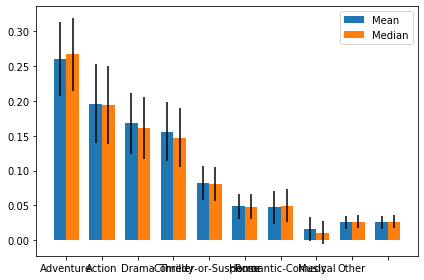

In [8]:
means =stats.loc['Mean']
stdev = stats.loc['StDev']
med = stats.loc['Med']

ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, means, width, yerr=stdev, label='Mean')
rects2 = ax.bar(ind + width/2, med, width, yerr=stdev, label='Median')



#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()


plt.show()

**Observations**: The mean and the median for each genre is relatively close in value, while the standard deviations are pretty small. This indicates low variation. However, income change has a large standard deviation.

# Line of Best Fit and Scatter Plot

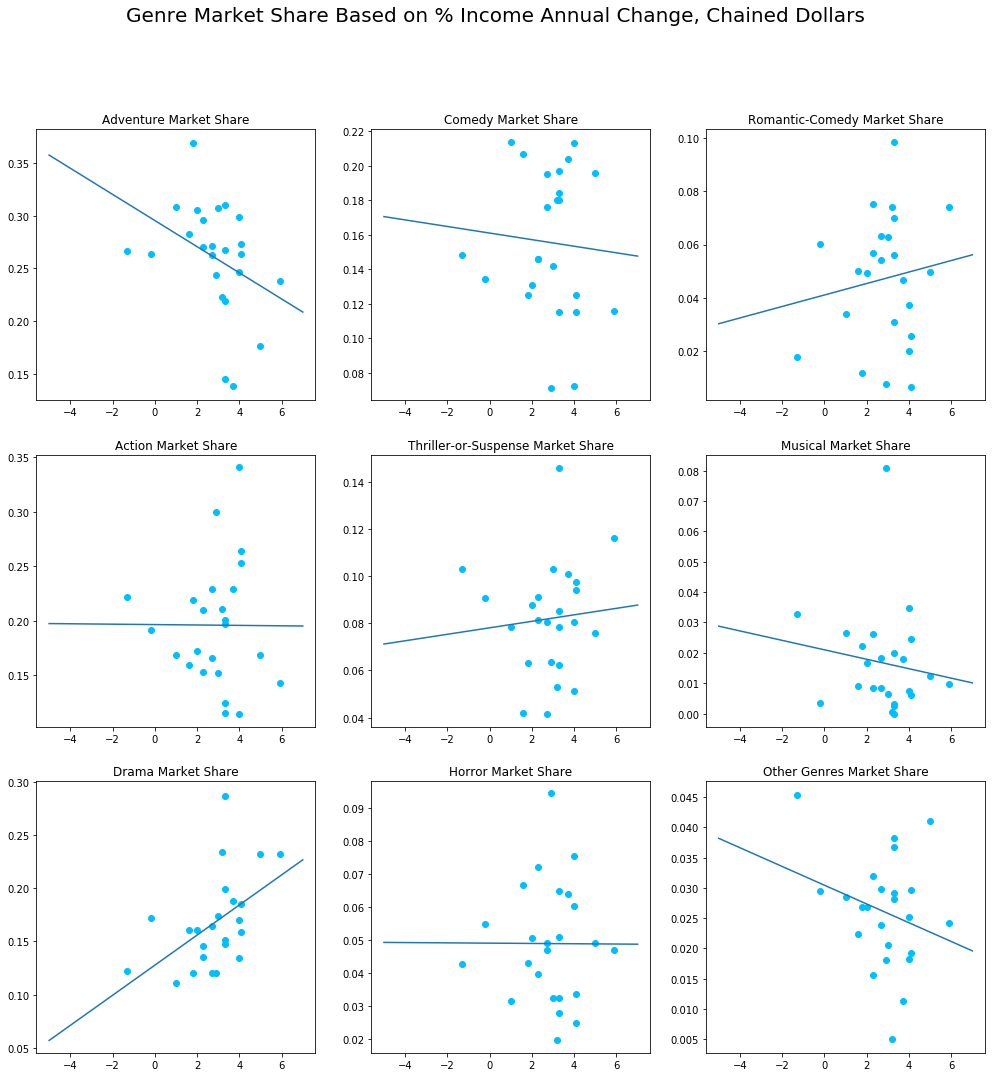

In [9]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + income, fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[income]], data[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(data[income], data[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(income)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()

# Finding r

In [154]:
for c in col:
    r= np.corrcoef(data[income], data[c])[0][1]
    print(c, ':', '{:.3f}'.format(r))

Adventure Market Share : -0.365
Action Market Share : -0.005
Drama Market Share : 0.500
Comedy Market Share : -0.070
Thriller-or-Suspense Market Share : 0.089
Horror Market Share : -0.004
Romantic-Comedy Market Share : 0.139
Musical Market Share : -0.142
Other Genres Market Share : -0.261


# Residuals StDev

In [11]:
for c in col:
    x=data[income]
    mean_x=x.mean()
    y=data[c]
    mean_y=y.mean()
    n=len(data[income])
    slope = np.sum((x - mean_x) * (y - mean_y)) / np.sum((y - mean_y)**2)
    intercept = mean_x - slope * mean_y
    predicted_x = y * slope + intercept
    residuals = x - predicted_x
    residual_std = np.sqrt(np.sum((residuals - residuals.mean())**2) / n)
    print(c)
    print('{:.3f}'.format(residual_std))

Adventure Market Share
1.414
Action Market Share
1.519
Drama Market Share
1.315
Comedy Market Share
1.515
Thriller-or-Suspense Market Share
1.513
Horror Market Share
1.519
Romantic-Comedy Market Share
1.504
Musical Market Share
1.503
Other Genres Market Share
1.466


# Is it Linear or Not? Spearman or r?

In [14]:
countsr = 0
countr= 0
for c in col:    
    nr = spearmanr(data[income],data[c])
    sr=nr.correlation
    r = np.corrcoef(data[income],data[c])[0][1]
    ans = 0
    if sr > r:
        kind='sr'
        ans=sr
        countsr +=1
    elif r > sr:
        kind='r'
        ans=r
        countr +=1
    else:
        kind='both'
        ans=r
    if abs(ans)>0.4:
        print('//')
    print(c,':',kind, '{:.3f}'.format(ans))
print()
print('Sr:', countsr, 'r:', countr)


Adventure Market Share : r -0.365
Action Market Share : sr 0.011
//
Drama Market Share : sr 0.526
Comedy Market Share : r -0.070
Thriller-or-Suspense Market Share : sr 0.151
Horror Market Share : r -0.004
Romantic-Comedy Market Share : r 0.139
Musical Market Share : r -0.142
Other Genres Market Share : sr -0.117

Sr: 4 r: 5


# Hypothesis Testing

In [143]:
# permutation of data for a given genre c
def permuted_y(c):
    return np.random.permutation(data[c].copy())

def findtheslope(x,c):
    #creates a dataframe with a permutated y and returns the slope 
    #purpose: ensure that ny, ndf, and nmodel are local variable that can be rewritten with each function call
    ny=permuted_y(c)
    ndf=pd.DataFrame({'ny':ny})
    nmodel=LinearRegression().fit(x,ndf[['ny']])
    return nmodel.coef_[0][0]

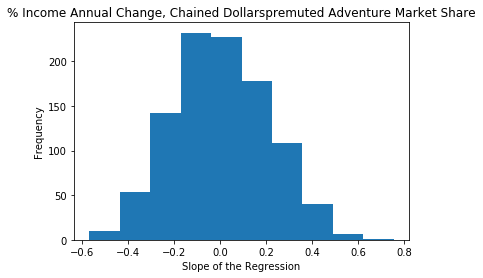

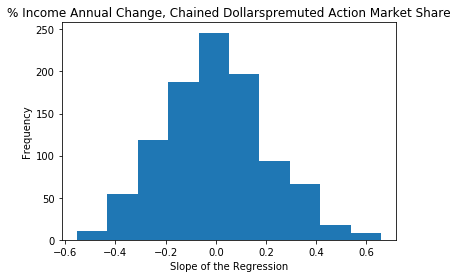

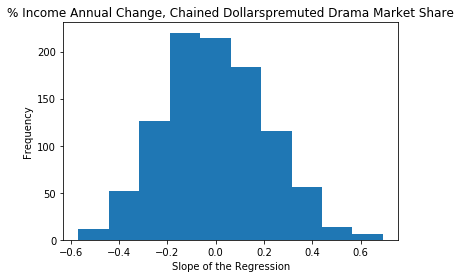

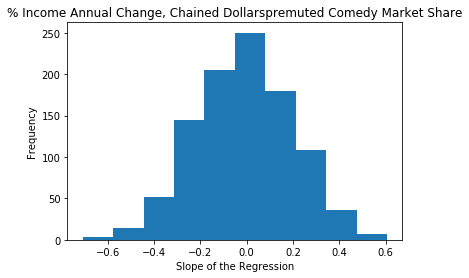

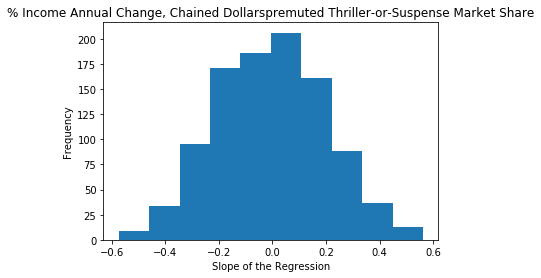

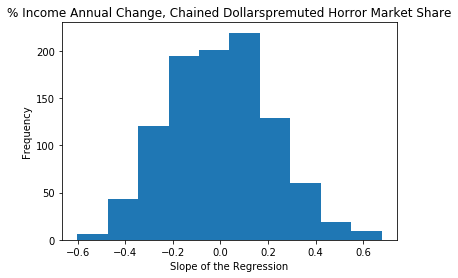

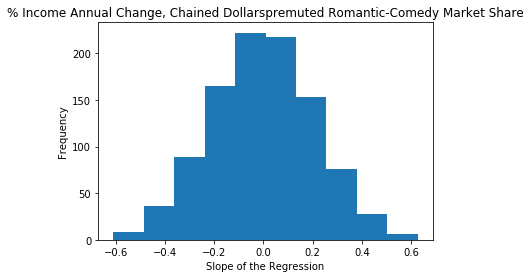

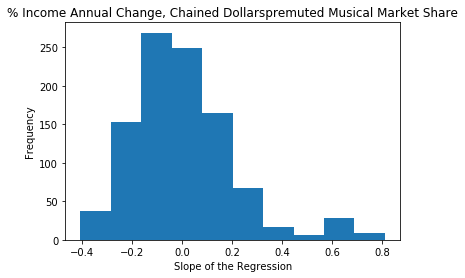

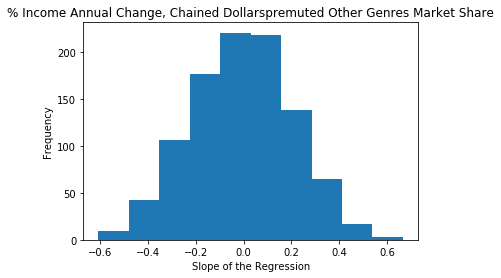

In [147]:
for c in col:  
    newarray = np.zeros(1000)
    for i in range(len(newarray)):
        newarray[i]=findtheslope(data[[c]],c)

    plt.hist(newarray)
    plt.title(income + ' Premuted '+ c)
    plt.xlabel('Slope of the Regression')
    plt.ylabel('Frequency')
    plt.show()

# Tryna Remove Dem Outliers

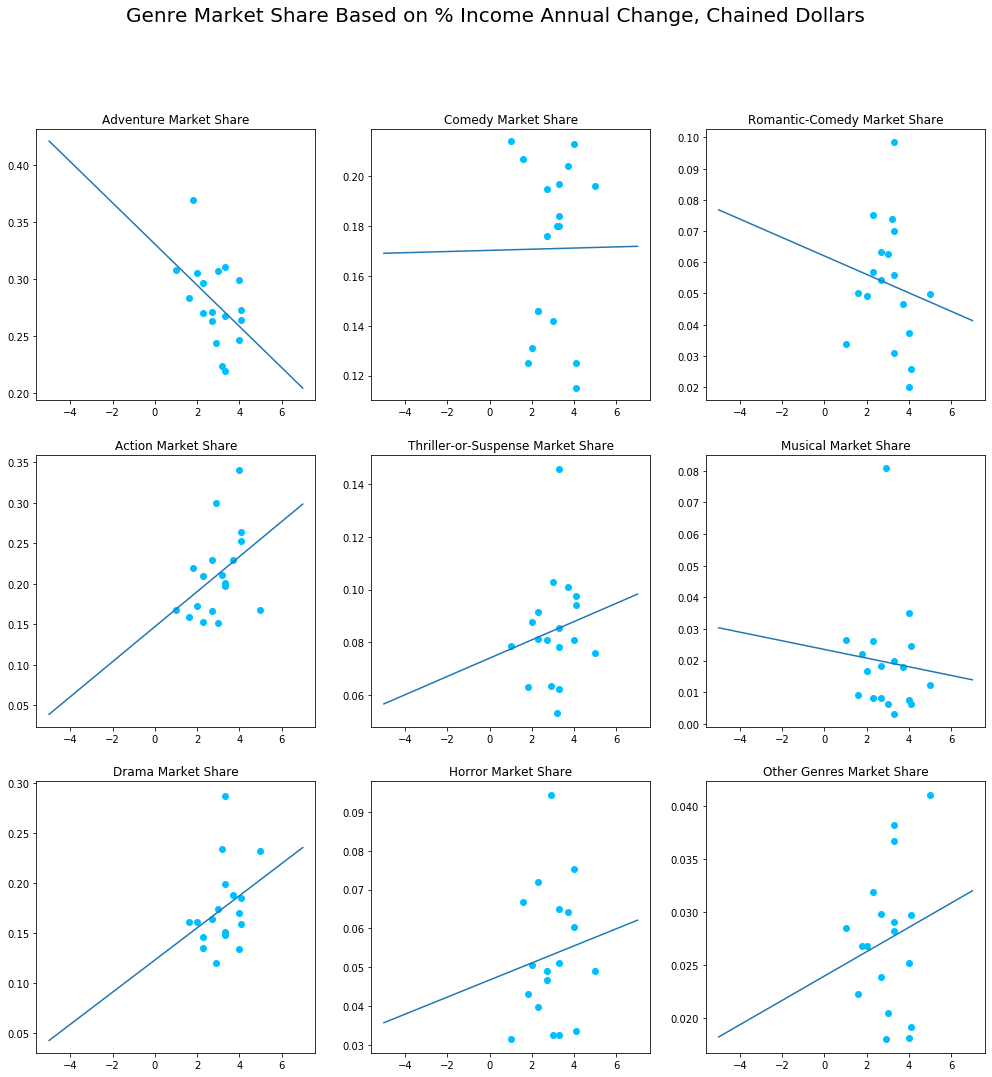

In [134]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + income, fontsize=20)

for c in col:
    #making sure that each run starts with a fresh version of the data and a 
    odata=data.copy()
    yrlist=list(range(1995,2019))
    
    #removing
    for number in range(3):
        #removing 'outliers' in the genre data
        arr=odata[c].to_numpy()
        mdarr = np.median(arr)
        mxarr=np.max(arr)
        mnarr=np.min(arr)
        
        if mxarr-mdarr > mdarr-mnarr:
            ind = np.where(arr == mxarr)[0][0]
        if mx-md < md-mn:
            ind = np.where(arr == mnarr)[0][0]
       
        ind = yrlist[ind]
        yrlist.remove(ind)
        odata=odata.drop(index=ind)  
        
        #removing 'outliers' in the income data
        incarr=odata[income].to_numpy()
        mdincarr=np.median(incarr)
        mxincarr=np.max(incarr)
        mnincarr=np.min(incarr)
        if mxincarr-mdincarr > mdincarr-mnincarr:
            incind = np.where(incarr == mxincarr)[0][0]
        if mxincarr-mdincarr < mdincarr-mnincarr:
            incind = np.where(incarr == mnincarr)[0][0] 
       
        incind = yrlist[incind]
        yrlist.remove(incind)
        odata=odata.drop(index=incind)  

    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(odata[[income]], odata[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(odata[income], odata[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(income)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()

23
